# EXPERIMENTO FINAL

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [250]:
# Leer archivo CSV
df1 = pd.read_csv('df_final_demo.txt')
df2 = pd.read_csv('df_final_experiment_clients.txt')
df3 = pd.read_csv('df_final_web_data_pt_1.txt') # Mergeados 3 y 4. Ahora dfpt
df4 = pd.read_csv('df_final_web_data_pt_2.txt') # Mergeados 3 y 4. Ahora dfpt

In [251]:
# Ver valores nulos df2
df2.isnull().sum()

client_id        0
Variation    20109
dtype: int64

In [252]:
df2 = df2.dropna()

In [253]:
df2.shape

(50500, 2)

In [254]:
# Unimos los dataframes df3 y df4
dfpt = pd.concat([df3, df4], ignore_index=True)

In [255]:
# Estandarizamos los nombres de las columnas
df1.columns = df1.columns.str.lower().str.strip().str.replace(" ", "_")
df2.columns = df2.columns.str.lower().str.strip().str.replace(" ", "_")
dfpt.columns = dfpt.columns.str.lower().str.strip().str.replace(" ", "_")

In [256]:
# Renombramos columnas mal escritas
df1 = df1.rename(columns={
    'clnt_tenure_yr': 'client_tenure_yr',
    'clnt_tenure_mnth': 'client_tenure_mnth',
    'clnt_age': 'client_age',
    'gendr': 'gender'
})

## LIMPIEZA DATOS

In [257]:
# Mostrar información básica y estadísticas descriptivas
print(df1.info())
print(df1.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   client_id           70609 non-null  int64  
 1   client_tenure_yr    70595 non-null  float64
 2   client_tenure_mnth  70595 non-null  float64
 3   client_age          70594 non-null  float64
 4   gender              70595 non-null  object 
 5   num_accts           70595 non-null  float64
 6   bal                 70595 non-null  float64
 7   calls_6_mnth        70595 non-null  float64
 8   logons_6_mnth       70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB
None
          client_id  client_tenure_yr  client_tenure_mnth    client_age  \
count  7.060900e+04      70595.000000        70595.000000  70594.000000   
mean   5.004992e+06         12.052950          150.659367     46.442240   
std    2.877278e+06          6.871819           82.089854    

In [258]:
print(df2.info())
print(df2.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 50500 entries, 0 to 50499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  50500 non-null  int64 
 1   variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB
None
          client_id
count  5.050000e+04
mean   5.006179e+06
std    2.877443e+06
min    5.550000e+02
25%    2.515646e+06
50%    5.025104e+06
75%    7.477933e+06
max    9.999832e+06


In [259]:
print(dfpt.info())
print(dfpt.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB
None
          client_id
count  7.554050e+05
mean   5.013632e+06
std    2.879152e+06
min    1.690000e+02
25%    2.519882e+06
50%    5.033441e+06
75%    7.496063e+06
max    9.999875e+06


## Verificamos y corregimos valores duplicados

In [260]:
# Valores no numericos -- OK
print(df1['gender'].unique())

['U' 'M' 'F' nan 'X']


In [261]:
# Ver duplicados en df1 en  la columna client_id
df1.duplicated().sum()

0

In [262]:
df2.duplicated().sum()

0

In [263]:
# cuantos 'Unknown' hay en 'Variation' en df2.

count_unknown = df2[df2['variation'] == 'Unknown'].shape[0]
count_unknown

0

In [264]:
# NO SE PUEDE BORRAR!!!
dfpt.duplicated().sum()

10764

## Verificamos y corregimos valores nulos

In [265]:
# Ver valores nulos df1
df1.isnull().sum()


client_id              0
client_tenure_yr      14
client_tenure_mnth    14
client_age            15
gender                14
num_accts             14
bal                   14
calls_6_mnth          14
logons_6_mnth         14
dtype: int64

In [266]:
df1.shape

(70609, 9)

In [267]:
# Eliminamos valores nulos de la columna client_age ya que son pocos (15), además que resuelve los valores nulos del resto de columnas
df1 = df1.dropna(subset=['client_age'])
print(df1.isnull().sum())
print(df1.shape)

client_id             0
client_tenure_yr      0
client_tenure_mnth    0
client_age            0
gender                0
num_accts             0
bal                   0
calls_6_mnth          0
logons_6_mnth         0
dtype: int64
(70594, 9)


In [268]:
# Ver valores nulos df2 - cambiar numericos
df2.isnull().sum()

client_id    0
variation    0
dtype: int64

In [269]:
# cuantos 'Unknown' hay en 'Variation' en df2.

count_unknown = df2[df2['variation'] == 'Unknown'].shape[0]
count_unknown

0

In [270]:
# Valores unicos df2
df2['variation'].unique()

array(['Test', 'Control'], dtype=object)

In [271]:
# Valores nulos en Variation
df2['variation'].isnull().sum()

0

In [272]:
# Cambiamos los valores NaN por Unkown de la columna Variation
df2['variation'] = df2['variation'].fillna('Unknown')
df2

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [273]:
# Ver valores nulos dfpt -- OK
dfpt.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [274]:
# Cambiamos dfpt confirm por finish
dfpt['process_step'] = dfpt['process_step'].replace({'confirm': 'finish'})

In [275]:
# Valores unicos en process_step
dfpt['process_step'].unique()

array(['step_3', 'step_2', 'step_1', 'start', 'finish'], dtype=object)

In [276]:
# Convertimos valores numericos process_step
dfpt['process_step'] = dfpt['process_step'].replace({'step_1': 1, 'step_2': 2, 'step_3': 3, 'start': 0, 'finish': 4})

In [277]:
# Valores unicos en visitor_id
dfpt['visitor_id'].unique()

array(['580560515_7732621733', '39393514_33118319366',
       '762728880_76361333336', ..., '473024645_56027518531',
       '388766751_9038881013', '947159805_81558194550'], dtype=object)

In [278]:
# Valores unicos en visit_id
dfpt['visit_id'].unique()

array(['781255054_21935453173_531117', '960651974_70596002104_312201',
       '949661017_22392791362_127391', ...,
       '172141804_88150434297_748843', '922267647_3096648104_968866',
       '86152093_47511127657_716022'], dtype=object)

In [279]:
# Convertir 'date_time' a tipo datetime
dfpt['date_time'] = pd.to_datetime(dfpt['date_time'], errors='coerce')

## Demographics

In [280]:
df1.sample(20)

,client_id,client_tenure_yr,client_tenure_mnth,client_age,gender,num_accts,bal,calls_6_mnth,logons_6_mnth
18208,3432043,9.0,109.0,37.5,M,2.0,244709.87,4.0,7.0
30748,6214973,4.0,59.0,35.5,U,2.0,45406.86,2.0,5.0
36405,9597731,11.0,135.0,61.5,F,2.0,88580.21,4.0,9.0
20099,1956823,8.0,101.0,36.0,U,2.0,103775.92,0.0,3.0
59437,4602596,21.0,253.0,43.0,M,2.0,80204.34,5.0,5.0
37119,1384394,19.0,238.0,77.0,F,2.0,84554.49,2.0,5.0
57805,9529786,12.0,155.0,51.5,F,2.0,146419.79,2.0,2.0
3260,1869478,4.0,58.0,19.0,U,2.0,36772.35,0.0,3.0
19836,7663280,19.0,230.0,42.0,M,2.0,34701.95,4.0,7.0
68798,9942744,7.0,85.0,27.0,U,2.0,44283.28,4.0,4.0


In [281]:
# Dividimos la columna client_age de df1 en adolescente (13 - 20), joven (21 - 40), adulto (41 - 61) y anciano (61 < )
valor_min = df1['client_age'].min()
valor_max = df1['client_age'].max()
print(f'Valor mínimo: {valor_min}')
print(f'Valor máximo: {valor_max}')

Valor mínimo: 13.5
Valor máximo: 96.0


In [282]:
df1['age_group'] = pd.cut(df1['client_age'], 
                          bins=[13, 20, 40, 61, float('inf')],
                          labels=['adolescente', 'joven', 'adulto', 'anciano'],
                          right=False)

print(df1.head())

   client_id  client_tenure_yr  client_tenure_mnth  client_age gender  \
0     836976               6.0                73.0        60.5      U   
1    2304905               7.0                94.0        58.0      U   
2    1439522               5.0                64.0        32.0      U   
3    1562045              16.0               198.0        49.0      M   
4    5126305              12.0               145.0        33.0      F   

   num_accts        bal  calls_6_mnth  logons_6_mnth age_group  
0        2.0   45105.30           6.0            9.0    adulto  
1        2.0  110860.30           6.0            9.0    adulto  
2        2.0   52467.79           6.0            9.0     joven  
3        2.0   67454.65           3.0            6.0    adulto  
4        2.0  103671.75           0.0            3.0     joven  


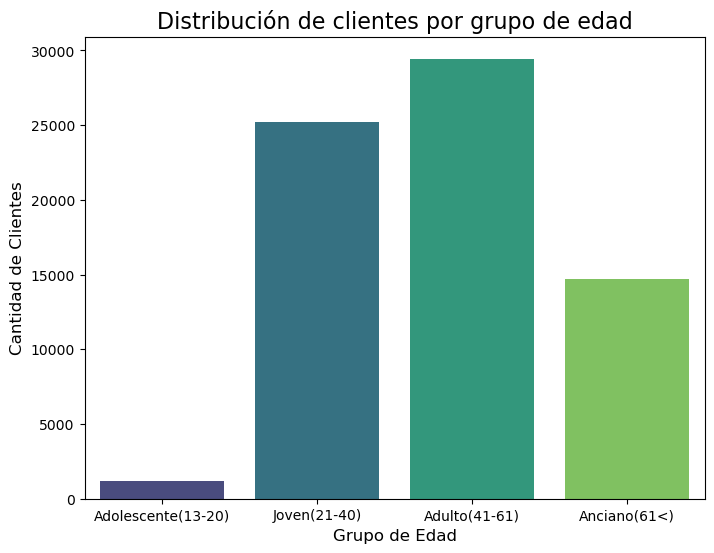

In [283]:
# Creamos un gráfico de barras para visualizarlo, en la presentación final se hará en Tableau o PowerBI

age_group_counts = df1['age_group'].value_counts()
age_group_counts = age_group_counts.reindex(['adolescente', 'joven', 'adulto', 'anciano'])

plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')

nuevas_etiquetas = ['Adolescente(13-20)', 'Joven(21-40)', 'Adulto(41-61)', 'Anciano(61<)']
plt.xticks(ticks=range(len(nuevas_etiquetas)), labels=nuevas_etiquetas)

plt.title('Distribución de clientes por grupo de edad', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

plt.show()

In [284]:
# Eliminamos los valores duplicados similares en date_time y client_id
dfpt = dfpt.drop_duplicates(subset=['date_time', 'client_id'], keep='first')


In [285]:
dfpt

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:44:34


In [286]:
df2

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [287]:
# Paso 1: Agrupar por client_id y process_step, luego contar las repeticiones
repeated_steps = dfpt.groupby(['client_id', 'process_step']).size().reset_index(name='count')

# Paso 2: Filtrar aquellos donde el 'count' sea mayor a 1 (indica repetición)
repeated_steps = repeated_steps[repeated_steps['count'] > 1]

# Paso 3: Unir con el DataFrame original para obtener toda la información
df_repeated = dfpt.merge(repeated_steps[['client_id', 'process_step']], on=['client_id', 'process_step'], how='inner')

# Resultado: df_repeated contiene todos los client_id con process_step repetido y su información completa
df_repeated

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:22
2,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:18:04
3,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:26:51
4,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:19:13
...,...,...,...,...,...
384334,9668240,388766751_9038881013,922267647_3096648104_968866,1,2017-05-24 18:44:51
384335,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 19:02:04
384336,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:46:10
384337,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:45:29


In [288]:
# Unir los DataFrames por client_id
df_errors_merged = pd.merge(df_repeated, df2, on='client_id', how='inner')

# Mostrar el DataFrame resultante
df_errors_merged

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:22,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:18:04,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:26:51,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:19:13,Test
...,...,...,...,...,...,...
166056,7049106,710348688_12741653529,412278907_8949064401_171038,0,2017-05-20 23:07:09,Test
166057,1129748,27929904_9079935779,974922467_42594903952_165673,0,2017-05-08 20:22:19,Control
166058,1129748,27929904_9079935779,974922467_42594903952_165673,0,2017-05-08 20:20:59,Control
166059,2908510,814969699_90652851448,562606085_36368381773_92090,0,2017-05-10 22:57:17,Control


In [289]:
df_errors_merged = df_errors_merged.drop_duplicates(subset=['client_id'], keep='first')
df_errors_merged = df_errors_merged.drop(columns=['process_step', 'date_time'])

df_errors_merged

,client_id,visitor_id,visit_id,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,Test
14,4033851,762728880_76361333336,949661017_22392791362_127391,Control
27,9294070,489274391_63794562906,116640698_27328181095_188045,Control
29,9466803,97277031_5793723360,812185460_4263902139_352107,Test
34,3170143,837774974_91015515080,758001412_25057963943_219559,Test
...,...,...,...,...
166039,5209748,272187882_49911837423,13626256_89074496787_576458,Test
166042,2678474,596182381_75493723269,904596113_96396800407_55092,Test
166053,7049106,710348688_12741653529,86841404_22147268626_427170,Test
166057,1129748,27929904_9079935779,974922467_42594903952_165673,Control


In [290]:
df2

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [291]:
# Paso 1: Encontrar los client_id comunes entre ambos DataFrames
common_clients = pd.merge(df_errors_merged[['client_id', 'variation']], df2[['client_id', 'variation']], on=['client_id', 'variation'], how='inner')

# Paso 2: Contar el total de client_id en cada grupo de 'variation' en ambos DataFrames
total_in_df_errors_merged = df_errors_merged.groupby('variation')['client_id'].nunique()
total_in_df2 = df2.groupby('variation')['client_id'].nunique()

# Paso 3: Contar los client_id comunes en cada grupo de 'variation'
common_clients_count = common_clients.groupby('variation')['client_id'].nunique()

# Paso 4: Calcular el porcentaje de coincidencias por 'variation'
error_rate = (common_clients_count / total_in_df2).round(4)

# Convertir el resultado a DataFrame y renombrar la columna como 'Error Rate'
error_rate_df = error_rate.reset_index()  # Convierte el índice 'variation' en una columna
error_rate_df.columns = ['Variation', 'Error Rate']  # Renombrar columnas

# Mostrar los resultados
error_rate_df

,Variation,Error Rate
0,Control,0.5104
1,Test,0.5854


In [292]:
# creamos un dataframe solo con client_id y date time para realizar el calculo de tiempo entre visitas
df_time = dfpt[['visit_id', 'date_time']]
df_time = df_time.drop_duplicates(subset=['visit_id', 'date_time'], keep='first')
df_time = df_time.sort_values(by=['visit_id', 'date_time'], ascending=[True, True])

In [293]:
# Creamos una columna con los segundos de cada visita para realizar el calculo de tiempo entre visitas
df_time['time_diff'] = df_time.groupby('visit_id')['date_time'].diff().fillna(pd.Timedelta(0))
df_time['time_diff'] = df_time['time_diff'].dt.total_seconds()
df_time

,visit_id,date_time,time_diff
108614,100012776_37918976071_457913,2017-04-26 13:22:17,0.0
108613,100012776_37918976071_457913,2017-04-26 13:23:09,52.0
447951,1000165_4190026492_760066,2017-06-04 01:07:29,0.0
447950,1000165_4190026492_760066,2017-06-04 01:07:32,3.0
447949,1000165_4190026492_760066,2017-06-04 01:07:56,24.0
...,...,...,...
539055,999992932_41666455053_671149,2017-06-06 15:46:24,21.0
539054,999992932_41666455053_671149,2017-06-06 15:47:32,68.0
539072,999992932_41666455053_671149,2017-06-06 16:01:46,854.0
539071,999992932_41666455053_671149,2017-06-06 16:04:08,142.0


In [294]:
# creamos un dataframe solo con un unico visit_id, que este client_1d y la suma de los segundos
df_time_sum = df_time.groupby('visit_id')['time_diff'].sum().reset_index()
df_time_sum

,visit_id,time_diff
0,100012776_37918976071_457913,52.0
1,1000165_4190026492_760066,141.0
2,100019538_17884295066_43909,242.0
3,100022086_87870757897_149620,180.0
4,100030127_47967100085_936361,0.0
...,...,...
158090,999986292_55082159911_561557,1895.0
158091,999988789_76411676596_272843,118.0
158092,999989069_52203656268_170206,4.0
158093,999991142_15352368745_399725,0.0


In [295]:
# a df_time_sum le agrego la columna de client_id
df_time_sum['client_id'] = df_time_sum['visit_id'].str.split('_').str[0]
df_time_sum

,visit_id,time_diff,client_id
0,100012776_37918976071_457913,52.0,100012776
1,1000165_4190026492_760066,141.0,1000165
2,100019538_17884295066_43909,242.0,100019538
3,100022086_87870757897_149620,180.0,100022086
4,100030127_47967100085_936361,0.0,100030127
...,...,...,...
158090,999986292_55082159911_561557,1895.0,999986292
158091,999988789_76411676596_272843,118.0,999988789
158092,999989069_52203656268_170206,4.0,999989069
158093,999991142_15352368745_399725,0.0,999991142


In [296]:
# Sumamos el client_id por time_diff en un dataframe que se llame suma_total_conexion
suma_total_conexion = df_time_sum.groupby('client_id')['time_diff'].sum().reset_index()
suma_total_conexion

,client_id,time_diff
0,100012776,52.0
1,1000165,141.0
2,100019538,242.0
3,100022086,180.0
4,100030127,0.0
...,...,...
158090,999986292,1895.0
158091,999988789,118.0
158092,999989069,4.0
158093,999991142,0.0


In [297]:
suma_total_conexion.dtypes

client_id     object
time_diff    float64
dtype: object

In [298]:
suma_total_conexion['client_id'] = pd.to_numeric(suma_total_conexion['client_id'], errors='coerce')

In [299]:
# Vemos los outliers

Q1 = suma_total_conexion.quantile(0.25)
Q3 = suma_total_conexion.quantile(0.75)
IQR = Q3 - Q1
    
# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
# Identify the outliers
outliers = suma_total_conexion[(suma_total_conexion < lower_bound) | (suma_total_conexion > upper_bound)]
outliers = outliers.dropna(subset=['time_diff'])

outliers

,client_id,time_diff
13,NaN,1194.0
36,NaN,1017.0
45,NaN,1013.0
53,NaN,933.0
129,NaN,1260.0
...,...,...
158043,NaN,926.0
158084,NaN,1709.0
158089,NaN,1050.0
158090,NaN,1895.0


In [300]:
# Eliminar los outliers de suma_total_conexion

suma_total_conexion = suma_total_conexion.drop(outliers.index)


In [301]:
# metemos la columna variation en suma_total_conexion

suma_total_conexion['variation'] = df2['variation']
suma_total_conexion

,client_id,time_diff,variation
0,100012776,52.0,Test
1,1000165,141.0,Test
2,100019538,242.0,Control
3,100022086,180.0,Test
4,100030127,0.0,Control
...,...,...,...
158087,999976049,728.0,NaN
158088,999984454,154.0,NaN
158091,999988789,118.0,NaN
158092,999989069,4.0,NaN


In [302]:
# eliminamos valores nulos
suma_total_conexion.dropna()

,client_id,time_diff,variation
0,100012776,52.0,Test
1,1000165,141.0,Test
2,100019538,242.0,Control
3,100022086,180.0,Test
4,100030127,0.0,Control
...,...,...,...
50495,388447998,132.0,Control
50496,388450285,362.0,Control
50497,388452892,94.0,Test
50498,388464498,264.0,Test


In [303]:
# Agrupar por la columna 'variation' (Control y Test) y calcular las medidas de tendencia central para 'time_diff'
tendencia_central = suma_total_conexion.groupby('variation')['time_diff'].agg(['mean', 'median', lambda x: x.mode()[0]])

# Renombrar las columnas para mayor claridad
tendencia_central.columns = ['Media', 'Mediana', 'Moda']

# Mostrar las medidas de tendencia central
print(tendencia_central)

                Media  Mediana  Moda
variation                           
Control    198.739072    151.0   0.0
Test       200.618152    151.0   0.0


In [304]:
# Añadimos la columna 'variation' a dfpt

dfpt2 = pd.merge(dfpt, df2, on='client_id', how='left')
dfpt2 = dfpt2.dropna(subset='variation')

dfpt2

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
628441,1574008,117364417_77840596075,528720790_71583064618_169151,0,2017-05-06 23:43:27,Test
628484,2908510,814969699_90652851448,562606085_36368381773_92090,0,2017-05-10 22:57:17,Control
628485,2908510,814969699_90652851448,562606085_36368381773_92090,2,2017-05-10 22:56:31,Control
628486,2908510,814969699_90652851448,562606085_36368381773_92090,1,2017-05-10 22:56:23,Control


In [305]:
# Ordena por 'client_id' y 'date_time' para calcular las diferencias de tiempo
dfpt2 = dfpt2.sort_values(by=['client_id', 'date_time'])

# Calcular la diferencia de tiempo en segundos dentro de cada 'client_id'
dfpt2['time_diff_seconds'] = dfpt2.groupby('client_id')['date_time'].diff().dt.total_seconds().fillna(0)

# Asegurarse de que el tiempo sea positivo
dfpt2['time_diff_seconds'] = dfpt2['time_diff_seconds'].abs()

# Agrupar por 'client_id' y 'process_step', y sumar el tiempo total en cada paso
time_spent_per_step = dfpt2.groupby(['client_id', 'process_step'])['time_diff_seconds'].sum().reset_index()

print(time_spent_per_step)

        client_id  process_step  time_diff_seconds
0             555             0                0.0
1             555             1                7.0
2             555             2               32.0
3             555             3               99.0
4             555             4               20.0
...           ...           ...                ...
207714    9999729             2              297.0
207715    9999729             3               39.0
207716    9999729             4               21.0
207717    9999832             0                0.0
207718    9999832             1                8.0

[207719 rows x 3 columns]


In [306]:
# Unimos los DF dfpt2 y time_spent_per_step por la columna client_id
dfpt3 = pd.merge(dfpt2, time_spent_per_step, on='client_id', how='left')
dfpt3.head(20)

,client_id,visitor_id,visit_id,process_step_x,date_time,variation,time_diff_seconds_x,process_step_y,time_diff_seconds_y
0,555,402506806_56087378777,637149525_38041617439_716659,0,2017-04-15 12:57:56,Test,0.0,0,0.0
1,555,402506806_56087378777,637149525_38041617439_716659,0,2017-04-15 12:57:56,Test,0.0,1,7.0
2,555,402506806_56087378777,637149525_38041617439_716659,0,2017-04-15 12:57:56,Test,0.0,2,32.0
3,555,402506806_56087378777,637149525_38041617439_716659,0,2017-04-15 12:57:56,Test,0.0,3,99.0
4,555,402506806_56087378777,637149525_38041617439_716659,0,2017-04-15 12:57:56,Test,0.0,4,20.0
5,555,402506806_56087378777,637149525_38041617439_716659,1,2017-04-15 12:58:03,Test,7.0,0,0.0
6,555,402506806_56087378777,637149525_38041617439_716659,1,2017-04-15 12:58:03,Test,7.0,1,7.0
7,555,402506806_56087378777,637149525_38041617439_716659,1,2017-04-15 12:58:03,Test,7.0,2,32.0
8,555,402506806_56087378777,637149525_38041617439_716659,1,2017-04-15 12:58:03,Test,7.0,3,99.0
9,555,402506806_56087378777,637149525_38041617439_716659,1,2017-04-15 12:58:03,Test,7.0,4,20.0


In [307]:
# Comprobamos que se haya realizado correctamente
dfpt3['variation'].unique()

array(['Test', 'Control'], dtype=object)

In [308]:
# Eliminamos columnas que no aportan valor y añadimos la columna time_diff_munites
dfpt3 = dfpt3.drop(['process_step_x', 'time_diff_seconds_x', 'date_time'], axis=1)
dfpt3['time_diff_minutes'] = dfpt3['time_diff_seconds_y'] / 60

dfpt3.head(20)

,client_id,visitor_id,visit_id,variation,process_step_y,time_diff_seconds_y,time_diff_minutes
0,555,402506806_56087378777,637149525_38041617439_716659,Test,0,0.0,0.000000
1,555,402506806_56087378777,637149525_38041617439_716659,Test,1,7.0,0.116667
2,555,402506806_56087378777,637149525_38041617439_716659,Test,2,32.0,0.533333
3,555,402506806_56087378777,637149525_38041617439_716659,Test,3,99.0,1.650000
4,555,402506806_56087378777,637149525_38041617439_716659,Test,4,20.0,0.333333
5,555,402506806_56087378777,637149525_38041617439_716659,Test,0,0.0,0.000000
6,555,402506806_56087378777,637149525_38041617439_716659,Test,1,7.0,0.116667
7,555,402506806_56087378777,637149525_38041617439_716659,Test,2,32.0,0.533333
8,555,402506806_56087378777,637149525_38041617439_716659,Test,3,99.0,1.650000
9,555,402506806_56087378777,637149525_38041617439_716659,Test,4,20.0,0.333333


In [309]:
# visualizar duplicados de dfpt3
dfpt3.duplicated().sum()

1140911

In [310]:
# eliminar duplicados de dfpt3
dfpt3 = dfpt3.drop_duplicates()

In [311]:
dfpt3

,client_id,visitor_id,visit_id,variation,process_step_y,time_diff_seconds_y,time_diff_minutes
0,555,402506806_56087378777,637149525_38041617439_716659,Test,0,0.0,0.000000
1,555,402506806_56087378777,637149525_38041617439_716659,Test,1,7.0,0.116667
2,555,402506806_56087378777,637149525_38041617439_716659,Test,2,32.0,0.533333
3,555,402506806_56087378777,637149525_38041617439_716659,Test,3,99.0,1.650000
4,555,402506806_56087378777,637149525_38041617439_716659,Test,4,20.0,0.333333
...,...,...,...,...,...,...,...
1431549,9999729,834634258_21862004160,870243567_56915814033_814203,Test,2,297.0,4.950000
1431550,9999729,834634258_21862004160,870243567_56915814033_814203,Test,3,39.0,0.650000
1431551,9999729,834634258_21862004160,870243567_56915814033_814203,Test,4,21.0,0.350000
1431572,9999832,145538019_54444341400,472154369_16714624241_585315,Test,0,0.0,0.000000


In [312]:
# Suponiendo que el DataFrame es df
# Paso 1: Calcular el rango intercuartil (IQR) de la columna time_diff_seconds_y
Q1 = dfpt3['time_diff_seconds_y'].quantile(0.25)
Q3 = dfpt3['time_diff_seconds_y'].quantile(0.75)
IQR = Q3 - Q1

# Paso 2: Definir los límites inferior y superior para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Paso 3: Filtrar los valores que estén dentro de los límites
df_filtered = dfpt3[(dfpt3['time_diff_seconds_y'] >= lower_bound) & (dfpt3['time_diff_seconds_y'] <= upper_bound)]
df_filtered = df_filtered.rename(columns={'process_step_y': 'process_step'})
# Mostrar el DataFrame sin outliers
df_filtered

,client_id,visitor_id,visit_id,variation,process_step,time_diff_seconds_y,time_diff_minutes
0,555,402506806_56087378777,637149525_38041617439_716659,Test,0,0.0,0.000000
1,555,402506806_56087378777,637149525_38041617439_716659,Test,1,7.0,0.116667
2,555,402506806_56087378777,637149525_38041617439_716659,Test,2,32.0,0.533333
3,555,402506806_56087378777,637149525_38041617439_716659,Test,3,99.0,1.650000
4,555,402506806_56087378777,637149525_38041617439_716659,Test,4,20.0,0.333333
...,...,...,...,...,...,...,...
1431549,9999729,834634258_21862004160,870243567_56915814033_814203,Test,2,297.0,4.950000
1431550,9999729,834634258_21862004160,870243567_56915814033_814203,Test,3,39.0,0.650000
1431551,9999729,834634258_21862004160,870243567_56915814033_814203,Test,4,21.0,0.350000
1431572,9999832,145538019_54444341400,472154369_16714624241_585315,Test,0,0.0,0.000000


In [313]:
# Contar el número de ocurrencias de cada variación
variation_counts = dfpt3['variation'].value_counts()
num_test = variation_counts.get('Test', 0)
num_control = variation_counts.get('Control', 0)

In [314]:
# Calculamos las medidas de tendencia central divididas por step y variation ya que las medidas de tendencia central del tiempo total no arroja valores significativos
estadisticas = df_filtered.groupby(['variation', 'process_step'])['time_diff_minutes'].agg(['mean', 'median', 'std', 'count'])
estadisticas[['mean', 'median', 'std']] = estadisticas[['mean', 'median', 'std']].round(2)

estadisticas

mean  median   std  count
variation process_step                           
Control   0             0.36    0.00  1.00  18018
          1             0.86    0.48  1.04  27089
          2             0.85    0.50  0.96  25809
          3             1.70    1.37  1.17  23227
          4             1.65    1.25  1.26  18343
Test      0             0.60    0.00  1.24  23177
          1             0.79    0.28  1.12  32321
          2             0.88    0.53  0.99  30049
          3             1.61    1.28  1.13  27862
          4             1.39    0.90  1.25  18731

In [315]:
# Calcular para el grupo 'Control'
count_control_step_4 = dfpt3[(dfpt3['process_step_y'] == 4) & (dfpt3['variation'] == 'Control')].shape[0]
count_control_step_0 = dfpt3[(dfpt3['process_step_y'] == 0) & (dfpt3['variation'] == 'Control')].shape[0]

if count_control_step_0 > 0:
    percentage_control = round((count_control_step_4 / count_control_step_0), 4)
else:
    percentage_control = 0

# Calcular para el grupo 'Test'
count_test_step_4 = dfpt3[(dfpt3['process_step_y'] == 4) & (dfpt3['variation'] == 'Test')].shape[0]
count_test_step_0 = dfpt3[(dfpt3['process_step_y'] == 0) & (dfpt3['variation'] == 'Test')].shape[0]

if count_test_step_0 > 0:
    percentage_test = round((count_test_step_4 / count_test_step_0), 4)
else:
    percentage_test = 0

# Crear un nuevo DataFrame con los resultados
df_result = pd.DataFrame({
    'Variation': ['Control', 'Test'],
    'Completion_rate': [percentage_control, percentage_test]
})

# Mostrar el DataFrame con los resultados
df_result

,Variation,Completion_rate
0,Control,0.6731
1,Test,0.7201


In [316]:
df_result.dtypes

Variation           object
Completion_rate    float64
dtype: object

In [317]:
# KPIs operativos: tiempos de producción (ok), calidad del producto (cuanto más tiempo mejor) y eficiencia del proceso(llegar al paso 4(ok), quienes han tardado menos en llegar del 0 al 4)

In [318]:
# Calidad del producto (cuanto más tiempo mejor)

In [319]:
# Agrupar por 'variation' y sumar 'time_diff_seconds'
total_time_days = dfpt3.groupby('variation')['time_diff_seconds_y'].sum().reset_index()

# Convertir a días
total_time_days['time_diff_days'] = total_time_days['time_diff_seconds_y'] / 86400

# Mostrar el resultado
print("\nSuma total de time_diff en días por grupo de variation:")
total_time_days


Suma total de time_diff en días por grupo de variation:


,variation,time_diff_seconds_y,time_diff_days
0,Control,2.810927e+10,325338.762766
1,Test,3.093546e+10,358049.277014


In [320]:
# Quienes han tardado menos en llegar del 0 al 4

In [321]:
# Filtrar client_id que tienen process_step_y igual a 4
client_ids_with_step_4 = dfpt3[dfpt3['process_step_y'] == 4]['client_id'].unique()

# Filtrar el DataFrame para incluir solo las filas con esos client_id
filtered_df = dfpt3[dfpt3['client_id'].isin(client_ids_with_step_4)]

# Mostrar el resultado
filtered_df.head(20)

,client_id,visitor_id,visit_id,variation,process_step_y,time_diff_seconds_y,time_diff_minutes
0,555,402506806_56087378777,637149525_38041617439_716659,Test,0,0.0,0.000000
1,555,402506806_56087378777,637149525_38041617439_716659,Test,1,7.0,0.116667
2,555,402506806_56087378777,637149525_38041617439_716659,Test,2,32.0,0.533333
3,555,402506806_56087378777,637149525_38041617439_716659,Test,3,99.0,1.650000
4,555,402506806_56087378777,637149525_38041617439_716659,Test,4,20.0,0.333333
25,647,66758770_53988066587,40369564_40101682850_311847,Test,0,0.0,0.000000
26,647,66758770_53988066587,40369564_40101682850_311847,Test,1,7.0,0.116667
27,647,66758770_53988066587,40369564_40101682850_311847,Test,2,18.0,0.300000
28,647,66758770_53988066587,40369564_40101682850_311847,Test,3,189.0,3.150000
29,647,66758770_53988066587,40369564_40101682850_311847,Test,4,163.0,2.716667


In [322]:
# Sumar el tiempo total en segundos por grupo
total_time_by_group = filtered_df.groupby('variation')['time_diff_seconds_y'].sum()

# Calcular el tiempo total
total_time = total_time_by_group.sum()

# Calcular el porcentaje para cada grupo
percentage_by_group = round((total_time_by_group / total_time), 4)

# Crear un nuevo DataFrame con los porcentajes
percentage_step4_df = percentage_by_group.reset_index()
percentage_step4_df.columns = ['variation', 'percentage']

percentage_step4_df

,variation,percentage
0,Control,0.4677
1,Test,0.5323


In [323]:
# Calcular el total de time_diff_minutes para Control y Test
total_time_reach_step_4 = filtered_df.groupby('variation')['time_diff_minutes'].sum()

# Mostrar el resultado
total_time_reach_step_4

variation
Control    3.128155e+08
Test       3.559698e+08
Name: time_diff_minutes, dtype: float64

In [324]:
# Convertir la serie en un DataFrame
total_time_reach_step_4 = total_time_reach_step_4.reset_index()

# Renombrar las columnas del DataFrame para mayor claridad (opcional)
total_time_reach_step_4.columns = ['variation', 'total_time_diff_minutes']

# Mostrar el DataFrame resultante
total_time_reach_step_4

,variation,total_time_diff_minutes
0,Control,3.128155e+08
1,Test,3.559698e+08


In [325]:
# Extraer los valores para Control, Test y Unknown
time_control = total_time_days.loc[total_time_days['variation'] == 'Control', 'time_diff_seconds_y'].values[0]
time_test = total_time_days.loc[total_time_days['variation'] == 'Test', 'time_diff_seconds_y'].values[0]

# Calcular la diferencia porcentual para Control y Unknown
percentage_control = ((time_test - time_control) / time_control) * 100

# Limitar los decimales a dos cifras
percentage_control_rounded = round(percentage_control, 2)

print(f"El grupo 'Test' ha pasado un {percentage_control_rounded} por ciento más en la pág web que el grupo 'Control'")

El grupo 'Test' ha pasado un 10.05 por ciento más en la pág web que el grupo 'Control'


In [326]:
# Filtrar solo las filas donde process_step_y es igual a 4
df_step_4 = dfpt3[dfpt3['process_step_y'] == 4]

# Calcular el tiempo promedio en segundos que tardó cada grupo en llegar al paso 4
promedio_control = df_step_4[df_step_4['variation'] == 'Control']['time_diff_seconds_y'].mean()
promedio_test = df_step_4[df_step_4['variation'] == 'Test']['time_diff_seconds_y'].mean()

# Comparar los tiempos y calcular qué porcentaje ha sido más rápido
if promedio_control < promedio_test:
    porcentaje_mas_rapido = ((promedio_test - promedio_control) / promedio_test) * 100
    grupo_mas_rapido = 'Control'
else:
    porcentaje_mas_rapido = ((promedio_control - promedio_test) / promedio_control) * 100
    grupo_mas_rapido = 'Test'

# Mostrar el resultado
print(f"El grupo '{grupo_mas_rapido}' ha sido un {porcentaje_mas_rapido:.2f}% más rápido en llegar al paso 4.")
print(f"Tiempo promedio de Control: {promedio_control:.2f} segundos")
print(f"Tiempo promedio de Test: {promedio_test:.2f} segundos")

El grupo 'Control' ha sido un 54.06% más rápido en llegar al paso 4.
Tiempo promedio de Control: 163734.79 segundos
Tiempo promedio de Test: 356374.75 segundos


In [327]:
# Difference in completion rates between the new design and the old design is statistically significant.
#Set the hypothesis

# if p<0.05 we reject H0
# if p>0.05 we fail to reject H0
# H0 = There is no difference in completion rates between the old and new
# H1 = There is a difference in completion rates between the old and new
# Data
x1 = count_control_step_4  # Number of completions for old design (control)
n1 = num_control  # Total users for old design
x2 = count_test_step_4  # Number of completions for new design (test)
n2 = num_test  # Total users for new design

# Completion rates
p1 = x1 / n1
p2 = x2 / n2

# Pooled proportion
p = (x1 + x2) / (n1 + n2)

# Z-test
z = (p1 - p2) / np.sqrt(p * (1 - p) * (1/n1 + 1/n2))
p_value = st.norm.sf(abs(z)) * 2  # Two-tailed p-value

# Calculate percentage increase
increase = p2 - p1
percentage_increase = (increase / p1) * 100

# Results
print(f"Z-Score: {z:.2f}")
print(f"P-Value: {p_value:.4f}")
print(f"Percentage Increase: {percentage_increase:.2f}%")

# Check if the increase meets the threshold
if percentage_increase >= 5:
    print("The increase in completion rate meets the 5% threshold.")
else:
    print("The increase in completion rate does not meet the 5% threshold.")

# Check significance
if p_value < 0.05:
    print("The difference in completion rates is statistically significant.")
else:
    print("The difference in completion rates is not statistically significant.")

Z-Score: -3.75
P-Value: 0.0002
Percentage Increase: 3.19%
The increase in completion rate does not meet the 5% threshold.
The difference in completion rates is statistically significant.


Puntaje Z: -3.75
Un puntaje Z de -3.75 indica que los datos observados están 3.75 desviaciones estándar por debajo de la media bajo la hipótesis nula. Esto sugiere una desviación considerable de lo que se esperaría si no hubiera efecto (es decir, si la hipótesis nula fuera cierta).

Valor P: 0.0002
Un valor p de 0.0002 indica que la probabilidad de observar un puntaje Z tan extremo (o uno más extremo) bajo la hipótesis nula es muy baja (0.02%). Dado que este valor es más bajo que los umbrales comunes de significancia (como 0.05 o 0.01), se rechaza la hipótesis nula, lo que indica que la diferencia en las tasas de finalización es estadísticamente significativa.

Aumento porcentual: 3.19%
Esto probablemente se refiere a un aumento observado del 3.19% en la tasa de finalización. Aunque esto representa un aumento, es importante interpretar su relevancia práctica.

El aumento en la tasa de finalización no alcanza el umbral del 5%.
Aquí estás mencionando que, aunque hubo un aumento del 3.19%, no es suficiente para cumplir con el criterio establecido (umbral del 5%) para considerarse relevante desde una perspectiva práctica. Esto sugiere que, aunque el resultado es estadísticamente significativo, no se alcanza el nivel mínimo esperado para considerarlo de importancia práctica.

In [328]:
# Exportar el DataFrame a un archivo CSV
df1.to_csv('df1.csv', index=False)
dfpt3.to_csv('dfpt3.csv', index=False)
total_time_days.to_csv('total_time_days.csv', index=False)
percentage_step4_df.to_csv('percentage_step4_df.csv', index=False)
df_result.to_csv('df_result.csv', index=False)
error_rate_df.to_csv('error_rate_df.csv', index=False)